In [2]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [3]:
data = pd.read_csv("../dataset/T807_Master Data Spreadsheet.csv")
data.head()

,SubNum,initials,dx,Sex,Age when seen,Sport etc.,Highest Level Played,Football?,Professional?,Hockey?,...,Rivermead,AUDIT,UTOX results,AMYVID PET RESULT,SUVr,Amyvid dose Injected (mCi),Minutes post injection for scan (Amyvid),T807 dose Injected (mCi),Minutes post injection for scan (T807),T807
0,T807_001,EM,mTBI,M,49,boxer,college,1,0,0,...,39.0,3,NEG,negative,1.075,10.00,50.0,10.10,80.0,negative
1,T807_002,SM,mTBI,M,39,football,professional,1,1,0,...,46.0,2,NEG,negative,0.929,9.80,51.0,10.20,80.0,positive
2,T807_004,BS,mTBI,M,53,soccer,professional,0,1,0,...,18.0,0,NEG,negative,0.829,10.30,54.0,10.12,79.0,negative
3,T807_005,GM,mTBI,M,59,hockey,professional,0,1,1,...,34.0,14,NEG,negative,0.985,8.33,49.0,10.03,74.0,negative
4,T807_006,QJ,mTBI,M,39,football,college,1,0,0,...,46.0,8,NEG,negative,0.925,9.00,42.0,10.20,78.0,negative


In [4]:
data.shape

(33, 103)

In [5]:
data.columns

Index([u'SubNum', u'initials', u'dx', u'Sex', u'Age when seen', u'Sport etc.',
       u'Highest Level Played', u'Football?', u'Professional?', u'Hockey?',
       ...
       u'Rivermead', u'AUDIT', u'UTOX results', u'AMYVID PET RESULT', u'SUVr',
       u'Amyvid dose Injected (mCi)',
       u'Minutes post injection for scan (Amyvid)',
       u'T807 dose Injected (mCi)', u'Minutes post injection for scan (T807)',
       u'T807'],
      dtype='object', length=103)

In [9]:
data.mean()

Age when seen                                     48.545455
Football?                                          0.393939
Professional?                                      0.575758
Hockey?                                            0.272727
Fighter?                                           0.121212
Education                                         15.045455
Categorical # of TBIs                              2.636364
WRAT-IV (SS)                                     106.718750
Digit Span_ SpanForward                            6.387097
Digit Span_SpanBackwards                           4.838710
Digit Span_Forw total RAW                         10.032258
Digit Span_Back total RAW                          8.741935
Coding_Raw                                        59.031250
Coding_SS                                          9.125000
SymbolSrch_Raw                                    26.875000
SymbolSrch_SS                                      8.656250
Similarities_Raw                        

In [11]:
data.dtypes

SubNum                                            object
initials                                          object
dx                                                object
Sex                                               object
Age when seen                                      int64
Sport etc.                                        object
Highest Level Played                              object
Football?                                          int64
Professional?                                      int64
Hockey?                                            int64
Fighter?                                           int64
Education                                        float64
Handedness                                        object
Categorical # of TBIs                              int64
LOC (0n/1y)                                       object
Alteration of Cs (0n/1y)                          object
PTA-0n/ 1y                                        object
WRAT-IV (SS)                   

In [42]:
df = df.select_dtypes(exclude=[object])

In [52]:
df = df.fillna(data.mean())

In [54]:
df

,Age when seen,Football?,Professional?,Hockey?,Fighter?,Education,WRAT-IV (SS),Digit Span_ SpanForward,Digit Span_SpanBackwards,Digit Span_Forw total RAW,...,poor concentration_rivermead,depression_rivermead,FAQ,Rivermead,AUDIT,SUVr,Amyvid dose Injected (mCi),Minutes post injection for scan (Amyvid),T807 dose Injected (mCi),Minutes post injection for scan (T807)
0,49,1,0,0,0,16.0,105.00000,6.387097,4.83871,10.032258,...,3.000000,4.000000,15.000000,39.000000,3,1.075000,10.000000,50.000000,10.100000,80.00000
1,39,1,1,0,0,16.0,123.00000,7.000000,6.00000,11.000000,...,4.000000,3.000000,4.000000,46.000000,2,0.929000,9.800000,51.000000,10.200000,80.00000
2,53,0,1,0,0,16.0,131.00000,7.000000,5.00000,12.000000,...,4.000000,0.000000,3.000000,18.000000,0,0.829000,10.300000,54.000000,10.120000,79.00000
3,59,0,1,1,0,13.0,101.00000,6.000000,4.00000,10.000000,...,2.000000,1.000000,1.000000,34.000000,14,0.985000,8.330000,49.000000,10.030000,74.00000
4,39,1,0,0,0,14.0,94.00000,7.000000,5.00000,11.000000,...,4.000000,2.000000,8.000000,46.000000,8,0.925000,9.000000,42.000000,10.200000,78.00000
5,57,0,1,1,0,13.0,101.00000,6.000000,5.00000,10.000000,...,2.000000,1.000000,8.000000,31.000000,4,0.930000,10.210000,61.000000,9.930000,80.00000
6,45,0,1,1,0,16.0,116.00000,6.000000,5.00000,10.000000,...,2.000000,2.000000,0.000000,13.000000,7,0.960000,10.100000,50.000000,10.150000,87.00000
7,62,0,1,1,0,12.0,126.00000,9.000000,7.00000,15.000000,...,1.000000,1.000000,0.000000,14.000000,6,0.870000,10.300000,52.000000,10.100000,83.00000
8,46,1,0,1,0,18.0,102.00000,5.000000,4.00000,8.000000,...,2.000000,0.000000,1.000000,18.000000,10,0.923000,10.200000,51.000000,10.100000,78.00000
9,63,1,0,0,0,15.5,92.00000,5.000000,4.00000,8.000000,...,3.000000,2.000000,10.000000,22.000000,0,1.096000,10.200000,55.000000,10.000000,80.00000


In [58]:
x = df.copy()
x.pop("Categorical # of TBIs")



KeyError: 'Categorical # of TBIs'

                                               Age when seen  Football?  \
Age when seen                                       1.000000   0.173675   
Football?                                           0.173675   1.000000   
Professional?                                       0.319403   0.064643   
Hockey?                                             0.198074  -0.354459   
Fighter?                                           -0.175450  -0.299425   
Education                                           0.173428   0.436763   
Categorical # of TBIs                               0.075128   0.206496   
WRAT-IV (SS)                                        0.319060  -0.210067   
Digit Span_ SpanForward                             0.089797  -0.207469   
Digit Span_SpanBackwards                            0.048642  -0.219569   
Digit Span_Forw total RAW                           0.189048  -0.296278   
Digit Span_Back total RAW                           0.058516  -0.180636   
Coding_Raw               

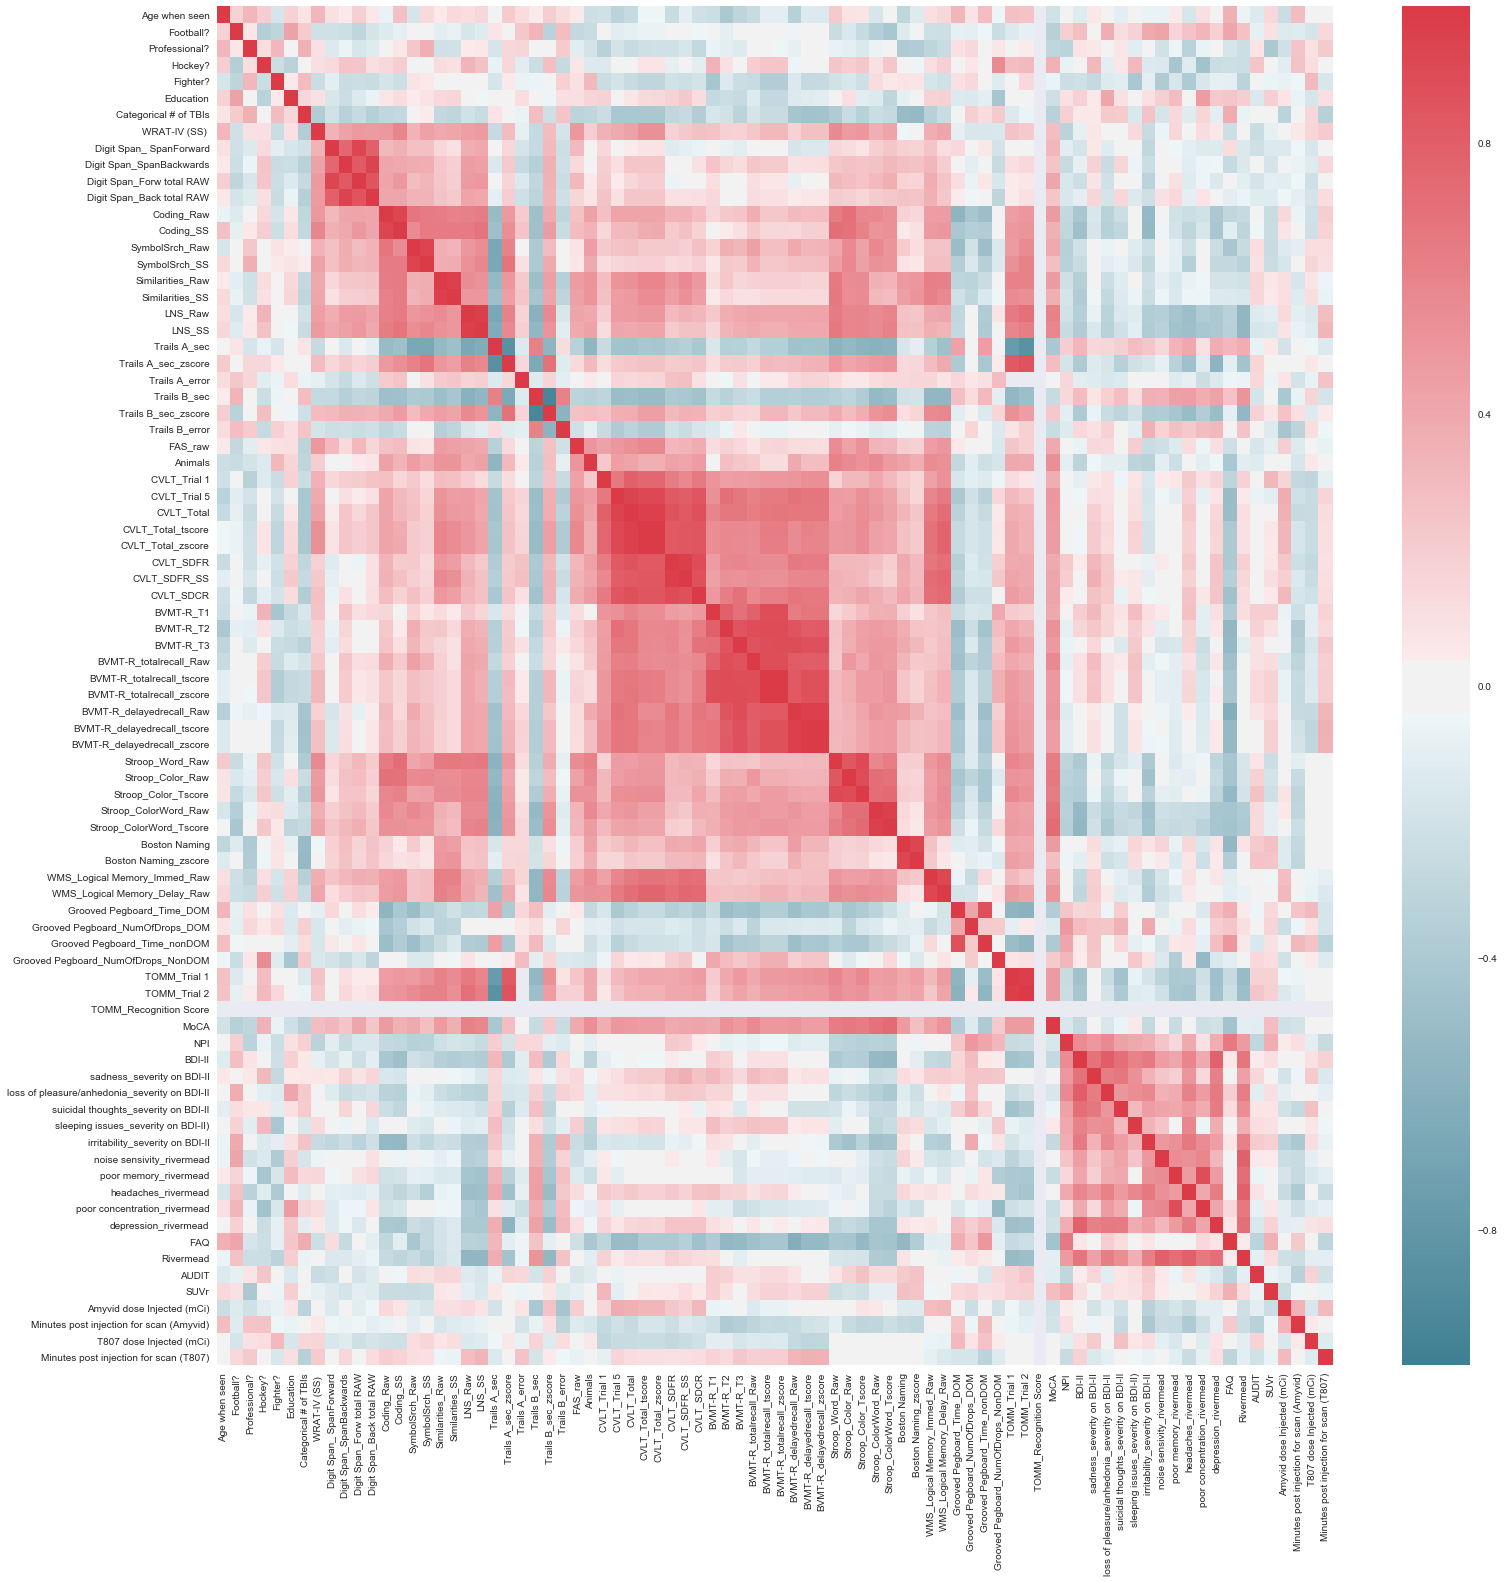

In [23]:

cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = df.corr()
f, ax = plt.subplots(figsize=(25, 25))
print correlations
print sns.heatmap(correlations, cmap=cmap)